In [2]:
import pandas as pd

# Load the data
prices_day_minus_1 = pd.read_csv('prices_round_2_day_-1.csv', delimiter=';')
prices_day_0 = pd.read_csv('prices_round_2_day_0.csv', delimiter=';')
prices_day_1 = pd.read_csv('prices_round_2_day_1.csv', delimiter=';')

# Combine the data frames for easier analysis
all_prices = pd.concat([prices_day_minus_1, prices_day_0, prices_day_1], ignore_index=True)

# Inspect the data
print(all_prices.head())


   timestamp  ORCHIDS  TRANSPORT_FEES  EXPORT_TARIFF  IMPORT_TARIFF  \
0          0  1200.00             1.5           10.5           -2.0   
1        100  1201.75             1.5            9.5           -2.0   
2        200  1201.75             1.5            9.5           -2.0   
3        300  1201.75             1.5            9.5           -2.0   
4        400  1201.75             1.5            9.5           -2.0   

    SUNLIGHT  HUMIDITY  DAY  
0  2500.0000  79.00000   -1  
1  2499.4197  79.00410   -1  
2  2498.8457  79.00821   -1  
3  2498.2780  79.01234   -1  
4  2497.7166  79.01649   -1  


In [7]:
def adjust_for_sunlight(sunlight_units):
    sunlight_hours = sunlight_units / 2500  # Convert sunlight units to hours based on provided unit
    if sunlight_hours < 7:
        decrease_factor = (7 - sunlight_hours) * 4 / 60  # 4% per 10 minutes
        return max(0, 1 - decrease_factor)  # Ensure it doesn't go below zero
    return 1

def adjust_for_humidity(humidity):
    if humidity < 60:
        decrease_factor = (60 - humidity) * 2 / 5  # Decrease by 2% for every 5% point below 60%
        return max(0, 1 - decrease_factor)  # Ensure it doesn't go below zero
    elif humidity > 80:
        increase_factor = (humidity - 80) * 2 / 5  # Increase by 2% for every 5% point above 80%
        return max(0, 1 - increase_factor)  # Ensure it doesn't go below zero
    return 1

# Example usage
sunlight_units = 2499.4197  # Example sunlight units
humidity = 79.00410  # Example humidity percentage

production_adjustment = adjust_for_sunlight(sunlight_units) * adjust_for_humidity(humidity)
print(f"Production adjustment factor: {production_adjustment}")



Production adjustment factor: 0.5999845253333334


In [9]:
def calculate_buy_cost(ask_price, transport_fee, import_tariff, quantity=1):
    return quantity * (ask_price + transport_fee + (import_tariff if import_tariff > 0 else 0))

# Rechecking the calculation with example values
ask_price = 1200.00  # Example ask price from your data
transport_fee = 1.5  # Example transport fee from your data
import_tariff = -2.0  # Example import tariff from your data

cost_to_buy = calculate_buy_cost(ask_price, transport_fee, import_tariff, quantity=10)
print(f"Cost to buy 10 ORCHIDS: {cost_to_buy}")


Cost to buy 10 ORCHIDS: 12015.0


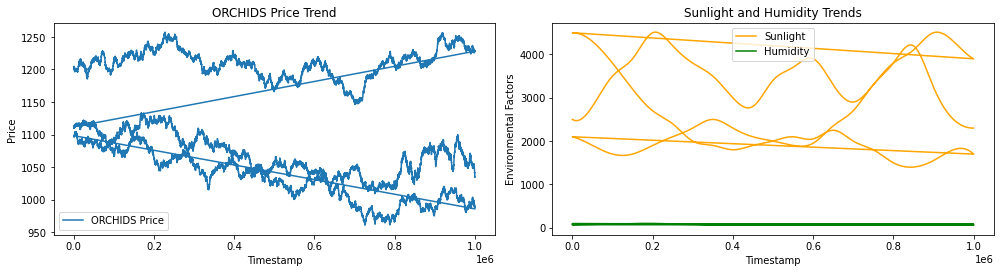

In [10]:
import matplotlib.pyplot as plt

# Assuming 'all_prices' is your DataFrame with all the combined data
plt.figure(figsize=(14, 7))

# Plot ORCHIDS prices
plt.subplot(2, 2, 1)
plt.plot(all_prices['timestamp'], all_prices['ORCHIDS'], label='ORCHIDS Price')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.title('ORCHIDS Price Trend')
plt.legend()

# Plot Sunlight and Humidity
plt.subplot(2, 2, 2)
plt.plot(all_prices['timestamp'], all_prices['SUNLIGHT'], label='Sunlight', color='orange')
plt.plot(all_prices['timestamp'], all_prices['HUMIDITY'], label='Humidity', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Environmental Factors')
plt.title('Sunlight and Humidity Trends')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# Calculate correlations
correlations = all_prices[['ORCHIDS', 'SUNLIGHT', 'HUMIDITY']].corr()
print("Correlations:\n", correlations)


Correlations:
            ORCHIDS  SUNLIGHT  HUMIDITY
ORCHIDS   1.000000  0.715692  0.710066
SUNLIGHT  0.715692  1.000000  0.622936
HUMIDITY  0.710066  0.622936  1.000000


In [13]:

# Load the data from the CSV file
data = pd.read_csv('orchids.csv', delimiter=';')

# Display the first few rows of the dataframe to understand its structure
print(data.head())

# Display summary statistics to understand the distribution of data
print(data.describe())


   day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0    2          0         ROSES        14421            30      14420.0   
1    2          0  STRAWBERRIES         4036           181          NaN   
2    2          0     AMETHYSTS         9996             2       9995.0   
3    2          0       ORCHIDS         1053             7       1052.0   
4    2          0     STARFRUIT         5023             1       5022.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          42.0          NaN           NaN        14422            72   
1           NaN          NaN           NaN         4037           181   
2          25.0          NaN           NaN        10004             2   
3           2.0       1046.0          46.0         1059             7   
4          27.0          NaN           NaN         5029            27   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0          NaN           NaN          Na

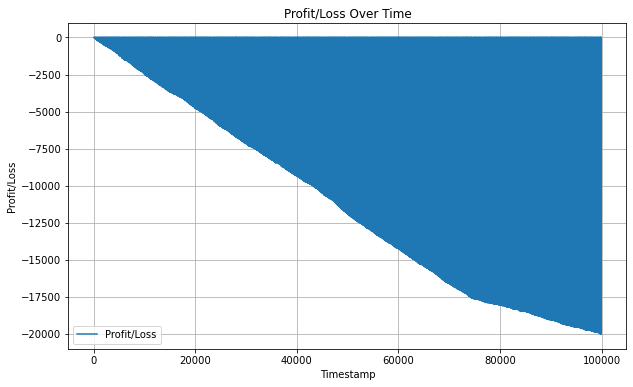

In [15]:
import matplotlib.pyplot as plt

# Assuming there is a 'P/L' column in your CSV that tracks profit/loss
plt.figure(figsize=(10, 6))
plt.plot(data['timestamp'], data['profit_and_loss'], label='Profit/Loss')
plt.title('Profit/Loss Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Profit/Loss')
plt.legend()
plt.grid(True)
plt.show()

# If positions are recorded, you can also plot those
if 'Position' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data['timestamp'], data['Position'], color='blue', label='Position')
    plt.title('Position Over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Position Size')
    plt.legend()
    plt.grid(True)
    plt.show()


In [16]:
# Plot entry and exit points if you have columns for 'Entry' and 'Exit' signals
if 'Entry_Signal' in data.columns and 'Exit_Signal' in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data['timestamp'], data['profit_and_loss'], label='Profit/Loss', color='gray')
    plt.scatter(data[data['Entry_Signal'] == 1]['timestamp'], data[data['Entry_Signal'] == 1]['profit_and_loss'], color='green', label='Buy Entry', marker='^', alpha=1)
    plt.scatter(data[data['Exit_Signal'] == 1]['timestamp'], data[data['Exit_Signal'] == 1]['profit_and_loss'], color='red', label='Sell Exit', marker='v', alpha=1)
    plt.title('Trade Entry and Exit Points')
    plt.xlabel('Timestamp')
    plt.ylabel('Profit/Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [17]:
# Checking for outliers or unusual trades
print(data[data['profit_and_loss'] < -1000])  # Adjust threshold according to your P/L scale


      day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
311     2       4400  ORCHIDS         1057             5       1056.0   
316     2       4500  ORCHIDS         1055            10       1054.0   
328     2       4600  ORCHIDS         1053             6       1052.0   
333     2       4700  ORCHIDS         1053             9       1052.0   
338     2       4800  ORCHIDS         1055             8       1054.0   
...   ...        ...      ...          ...           ...          ...   
6966    2      99500  ORCHIDS         1044             9       1043.0   
6978    2      99600  ORCHIDS         1048             8       1047.0   
6983    2      99700  ORCHIDS         1048            10       1047.0   
6988    2      99800  ORCHIDS         1048             9       1047.0   
6994    2      99900  ORCHIDS         1048             5       1047.0   

      bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
311            5.0       1050.0          47.0  

In [18]:
# Check correlations
print(data.corr())


                 day  timestamp  bid_price_1  bid_volume_1  bid_price_2  \
day              NaN        NaN          NaN           NaN          NaN   
timestamp        NaN   1.000000     0.000314      0.005926     0.004953   
bid_price_1      NaN   0.000314     1.000000     -0.284774     1.000000   
bid_volume_1     NaN   0.005926    -0.284774      1.000000    -0.222854   
bid_price_2      NaN   0.004953     1.000000     -0.222854     1.000000   
bid_volume_2     NaN   0.005499    -0.165705      0.827621    -0.165698   
bid_price_3      NaN  -0.033019     1.000000     -0.780803     1.000000   
bid_volume_3     NaN   0.018437    -0.723092      0.737189    -0.723077   
ask_price_1      NaN   0.000315     1.000000     -0.284839     1.000000   
ask_volume_1     NaN  -0.000878    -0.284784      0.788930    -0.245314   
ask_price_2      NaN   0.005583     1.000000     -0.253577     1.000000   
ask_volume_2     NaN   0.028990    -0.172658      0.930875     0.052381   
ask_price_3      NaN  -0.

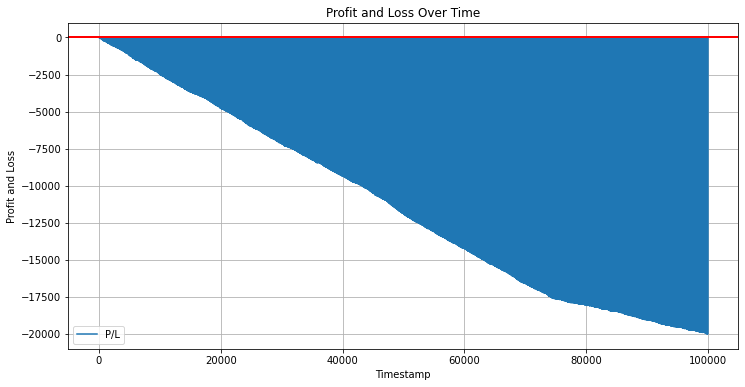

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('orchids.csv', delimiter=';')

# Plot P/L over time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['profit_and_loss'], label='P/L')
plt.title('Profit and Loss Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Profit and Loss')
plt.grid(True)
plt.axhline(0, color='red', lw=2)  # Zero line for reference
plt.legend()
plt.show()


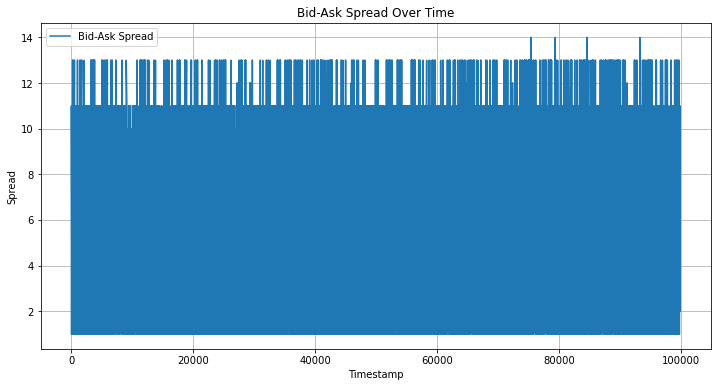

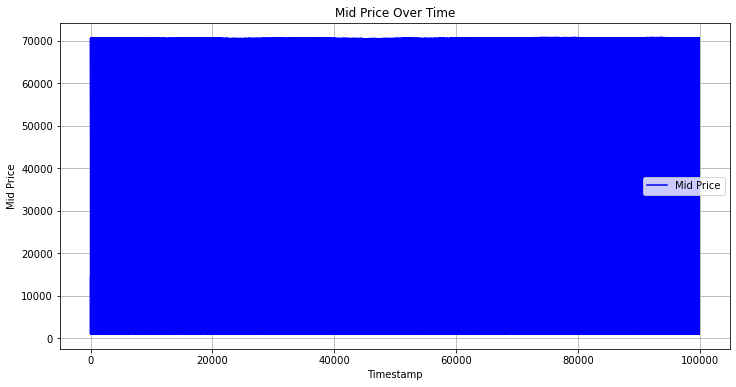

In [22]:
# Calculate the spread and add it to the dataframe
data['spread'] = data['ask_price_1'] - data['bid_price_1']

# Plot the spread over time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['spread'], label='Bid-Ask Spread')
plt.title('Bid-Ask Spread Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Spread')
plt.grid(True)
plt.legend()
plt.show()

# Plot Mid Price over time
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['mid_price'], label='Mid Price', color='blue')
plt.title('Mid Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.grid(True)
plt.legend()
plt.show()


In [23]:
# Correlation between spread and P/L
correlation = data['spread'].corr(data['profit_and_loss'])
print("Correlation between spread and P/L:", correlation)


Correlation between spread and P/L: -0.1813504091160247


In [24]:
# Find instances where P/L changes significantly
data['p/l_change'] = data['profit_and_loss'].diff()
extreme_changes = data[data['p/l_change'].abs() > 1000]  # Adjust threshold based on your data
print(extreme_changes[['timestamp', 'p/l_change', 'bid_price_1', 'ask_price_1', 'mid_price']])


      timestamp    p/l_change  bid_price_1  ask_price_1  mid_price
311        4400  -1026.000000         1057         1064     1060.5
312        4400   1026.000000         4036         4038     4037.0
316        4500  -1033.500000         1055         1062     1058.5
317        4500   1033.500000         4036         4037     4036.5
328        4600  -1043.500000         1053         1060     1056.5
...         ...           ...          ...          ...        ...
6984      99700  19983.843750         9995        10005    10000.0
6988      99800 -19999.843750         1048         1055     1051.5
6989      99800  19999.843750         4043         4044     4043.5
6994      99900 -20015.242188         1048         1055     1051.5
6995      99900  20015.242188         9998        10004    10001.0

[1884 rows x 5 columns]


In [25]:
# Detailed examination of periods with large losses
large_losses = data[data['profit_and_loss'] < -1000]  # Adjust the threshold as per the analysis
print(large_losses[['timestamp', 'bid_price_1', 'ask_price_1', 'mid_price', 'spread', 'profit_and_loss']])


      timestamp  bid_price_1  ask_price_1  mid_price  spread  profit_and_loss
311        4400         1057         1064     1060.5       7     -1026.000000
316        4500         1055         1062     1058.5       7     -1033.500000
328        4600         1053         1060     1056.5       7     -1043.500000
333        4700         1053         1060     1056.5       7     -1064.500000
338        4800         1055         1062     1058.5       7     -1114.000000
...         ...          ...          ...        ...     ...              ...
6966      99500         1044         1052     1048.0       8    -19929.144531
6978      99600         1048         1055     1051.5       7    -19975.042969
6983      99700         1048         1055     1051.5       7    -19983.843750
6988      99800         1048         1055     1051.5       7    -19999.843750
6994      99900         1048         1055     1051.5       7    -20015.242188

[956 rows x 6 columns]
